# EXPLORATORY DATA ANALYSIS

![sales-prediction](exploratory-explanatory-862x451.png)

Here, we will be exploring the data to identify trends and outliers. 

We have some questions that we will be trying to answer , 
+ like which products were top top sellers. 
+ Are: Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.
+ Stores located in densely populated areas should have higher sales because of more demand.
+ Stores located within popular marketplaces should have higher sales because of better access to customers.
+ Established stores often enjoy higher sales compared to newer ones because customers tend to trust and purchase from familiar vendors.
+ Products which are given bigger shelves in the store are likely to catch attention first and sell more.
+ The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.

Remember that the data might not be sufficient to test all of these, but forming these gives us a better understanding of the problem and we can even look for open source information if available.

Lets move on to the data exploration where we will have a look at the data in detail.

But a big part of exploratory analysis is … well, just exploring, looking to see what happened and what seems noteworthy. 

In [25]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from scipy.stats import mode

In [2]:
# load the data (cleaned)
bigmart = pd.read_csv('bigmart_cleaned.csv')

bigmart_copy = bigmart.copy() # create a copy of the data
bigmart_copy.head()

,Item_Weight,Item_Fat_Content,Item_Visibility (%),Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_Category,Item_MRP_Category
0,9.30,Low Fat,2.0,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,14,Food,Very High
1,5.92,Regular,2.0,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,4,Drink,Low
2,17.50,Low Fat,2.0,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,14,Food,High
3,19.20,Regular,12.0,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,15,Food,High
4,8.93,No Fat,6.0,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,26,Non-Consumable,Low


## Univariate Analysis

### 1. Distribution of Numerical Columns with Histogram

Observations:

+ We observe that the item weight range from 5 Kg to 23 Kg.
+ Item_Visibility and Item_Outlet-Sales feature is right skewed. We can may be try to do a transformation in order to obtain a normal ou Gaussian distribution
+ There are more products in the range of 100 MRP - 180 MRP in the Item_MRP feature
+ We can observe that a lots of stores have been established in the years 1985, 1998 etc... and there was no store establishment between 1989 and 1996.
+ It can be aslo be see that Item Weight and Item MRP follows a normal distribution aproximately.

In [3]:
# create a list of numeric columns
numeric_cols = bigmart_copy.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols

['Item_Weight',
 'Item_Visibility (%)',
 'Item_MRP',
 'Item_Outlet_Sales',
 'Outlet_Age']

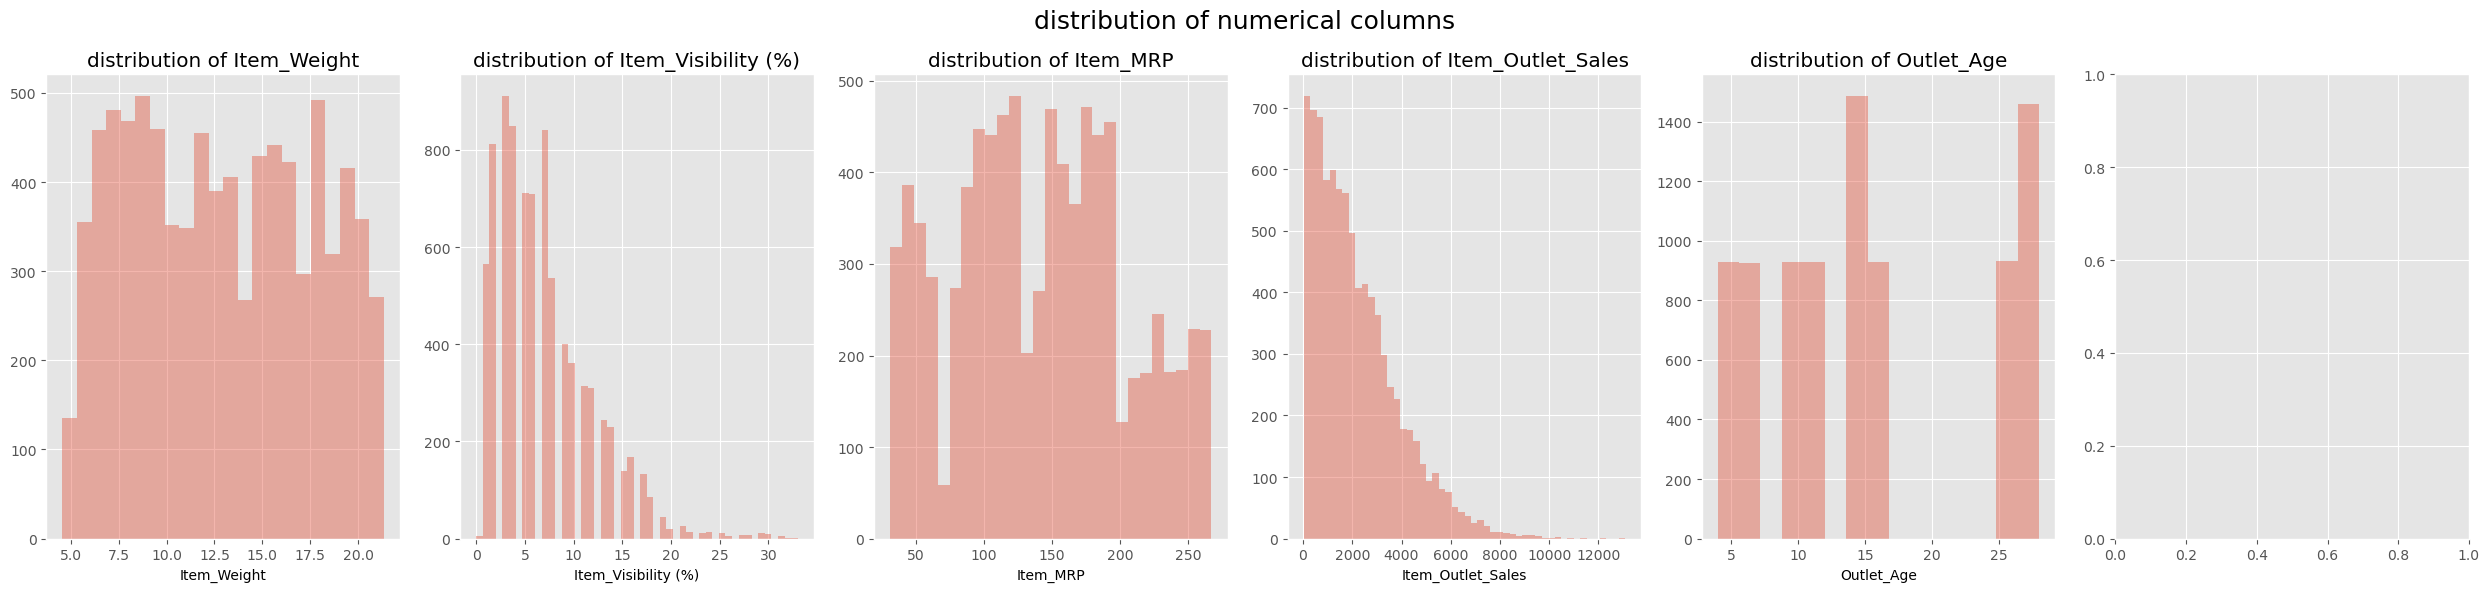

In [4]:
# create a suplot
_, ax = plt.subplots(nrows =1, ncols= 6,
                    figsize = (25, 6))

# create a distribution plot setting KDE = True
for index, col in enumerate(numeric_cols):
    sns.distplot(bigmart_copy[col], kde = False, ax = ax[index])
    ax[index].set_title(f"distribution of {col}")
    #ax.ylabel(f'number of entries per category or values')
    _.suptitle('distribution of numerical columns', fontsize = 18)
    plt.tight_layout()

 ### 2.  Distribution of Numerical Columns with Boxplot
 
 + majority of the outlet have been in existence betweeen 14 years and above
 + There are outliers in the Item_Visibility and Item_Outlet_Sales column. We will have to remove some outliers
 + Vlaues in the Item_Weight and Item_MRP column seems to be evenly distributed as confirmed before.

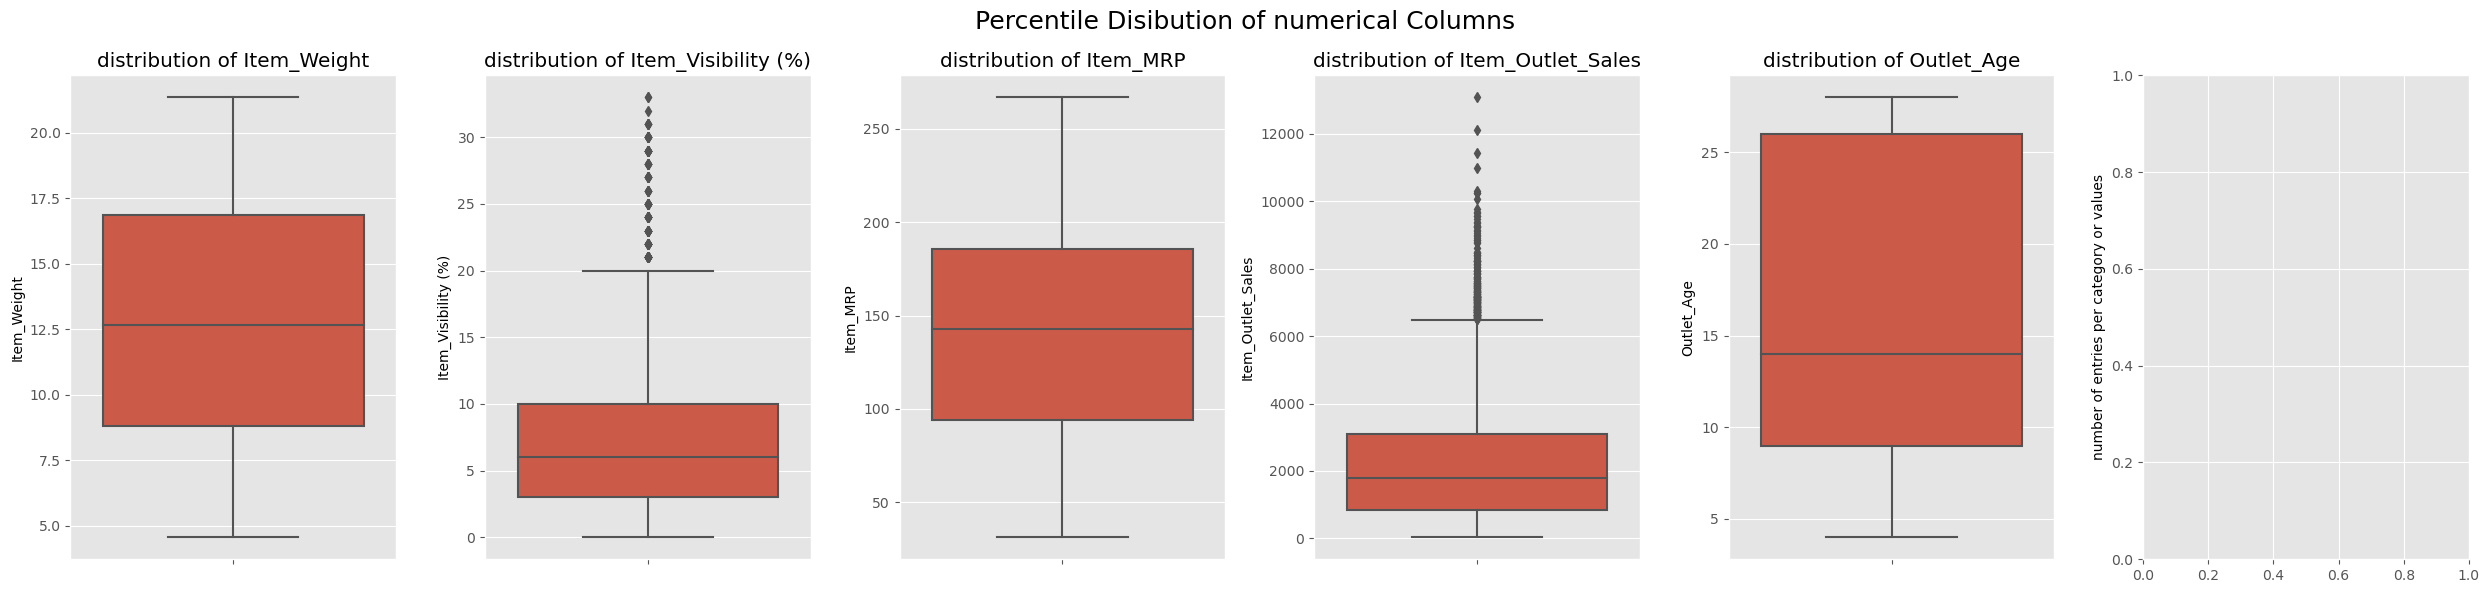

In [5]:
# create a suplot
_, ax = plt.subplots(nrows =1, ncols= 6,
                    figsize = (25, 6))

# create a distribution plot setting KDE = True
for index, col in enumerate(numeric_cols):
    sns.boxplot(bigmart_copy, y = col, ax = ax[index])
    ax[index].set_title(f"distribution of {col}")
    plt.ylabel('number of entries per category or values')
    _.suptitle('Percentile Disibution of numerical Columns', fontsize = 18)
    plt.tight_layout()

## BiVariate Analysis

### 1. Proportion of each item type for each outlet

+ All sales Outlet had similar buying pattern as the proportion of each item type category is almost the same.
+ As expected, food items are the commonly purchased across all outlet given the fact that it one of the most important need of the human followed by non-consumables and then drinks
+ Every sales Outlet have all item categories 

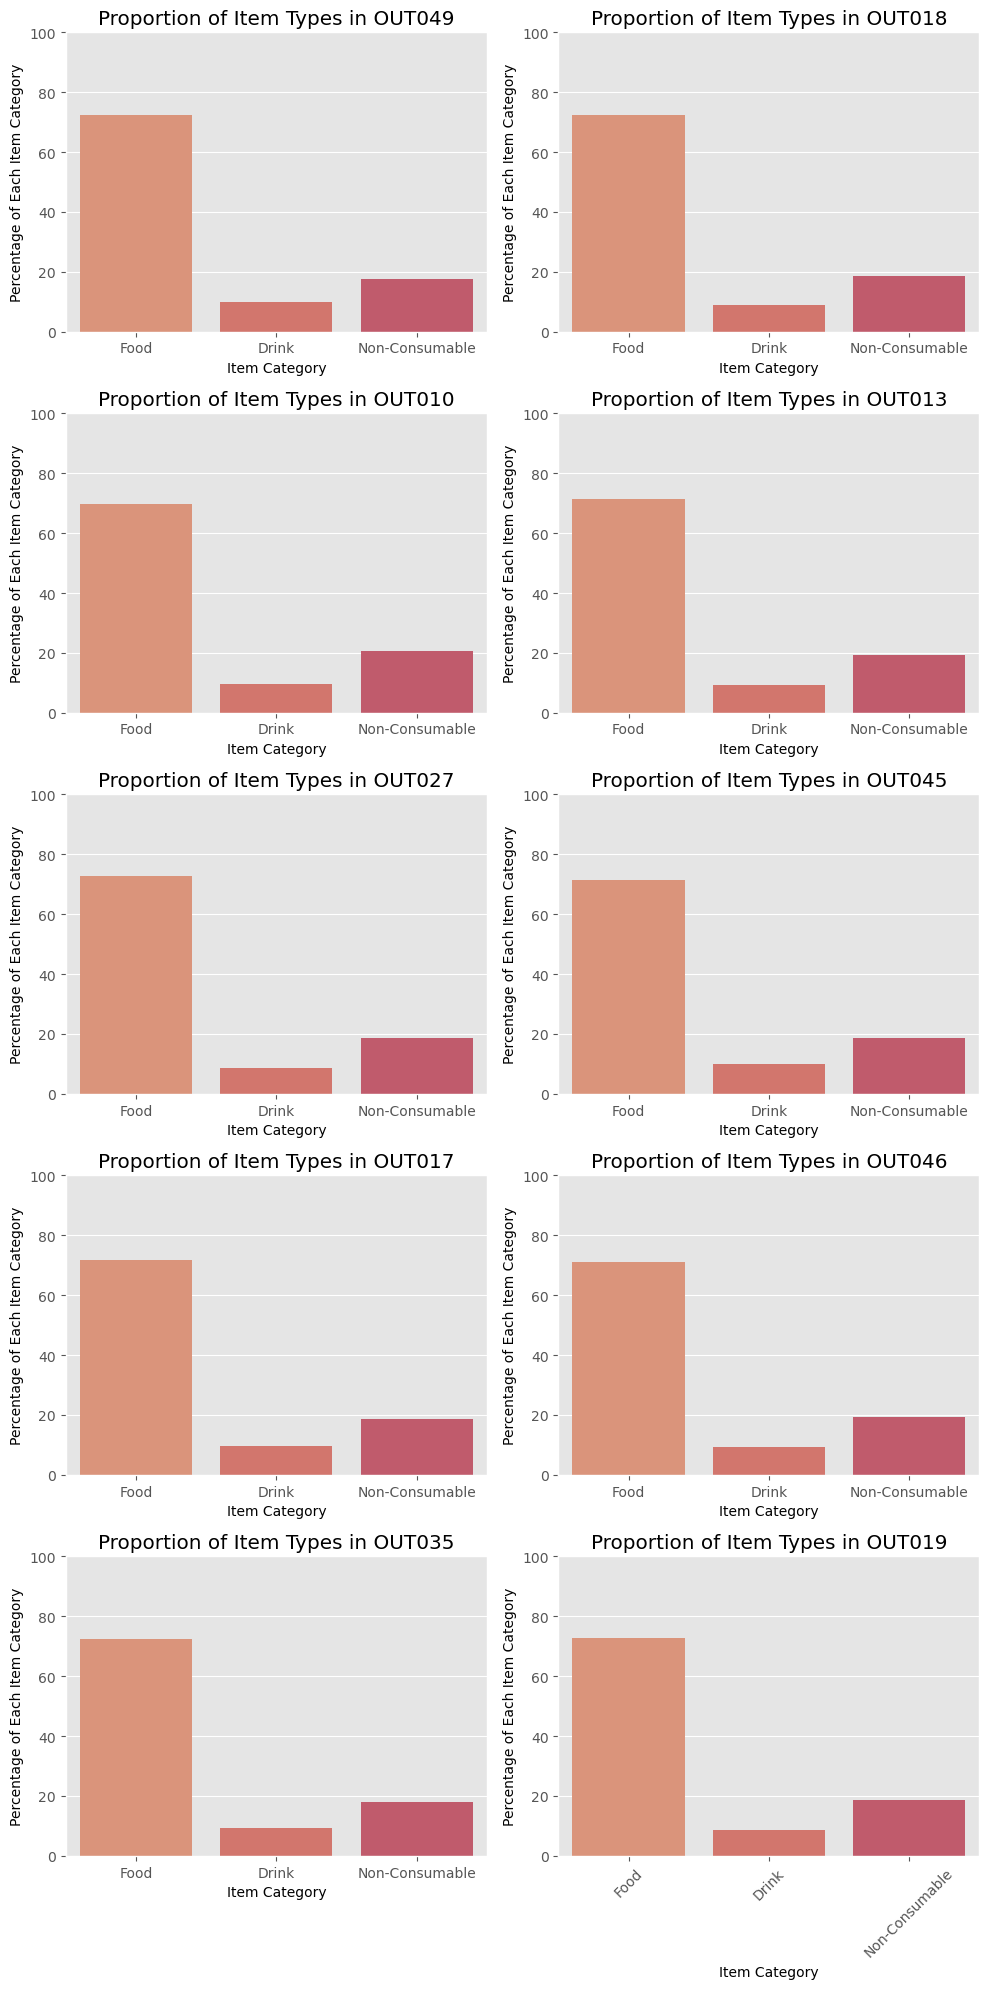

In [39]:

# First, calculate the percentage of each Item_Type within each Outlet_Type
bigmart_copy_percent = bigmart_copy.groupby(['Outlet_Identifier', 'Item_Type_Category']).size().\
                       groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name='Percentage')
# Create a list of unique Outlet_Types
outlet_types = bigmart_copy['Outlet_Identifier'].unique()

# Set up the subplots
fig, axes = plt.subplots(nrows=5, ncols = 2, figsize=(10, 20))
axes = axes.flatten()

# If there's only one subplot, axes won't be an array, so we handle that case

sns.set_palette('flare')
# Create a barplot for each outlet type
for ax, outlet in zip(axes, outlet_types):
    sns.barplot(data=bigmart_copy_percent[bigmart_copy_percent['Outlet_Identifier'] == outlet], 
                x='Item_Type_Category', 
                y='Percentage',
                order = ['Food', 'Drink', 'Non-Consumable'],
                ax=ax)
    ax.set_title(f'Proportion of Item Types in {outlet}')
    ax.set_ylabel('Percentage of Each Item Category')
    ax.set_xlabel('Item Category')
    ax.set_ylim(0, 100)
    plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust()
plt.show()


### 2. which sales outlet is making more sales